In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('C:/Users/Gaurav Singh/Desktop/jupyter/Iris.csv')

In [15]:
df.head(4)

,Id,SepalLengthCm,SepalWidthCm,Species
0,1,5.1,3.5,Iris-setosa
1,2,4.9,3.0,Iris-setosa
2,3,4.7,3.2,Iris-setosa
3,4,4.6,3.1,Iris-setosa


In [6]:
df.drop(['PetalLengthCm','PetalWidthCm'],axis=1,inplace=True)
df.head(4)

,Id,SepalLengthCm,SepalWidthCm,Species
0,1,5.1,3.5,Iris-setosa
1,2,4.9,3.0,Iris-setosa
2,3,4.7,3.2,Iris-setosa
3,4,4.6,3.1,Iris-setosa


Text(0.5, 1.0, 'Iris Dataset')

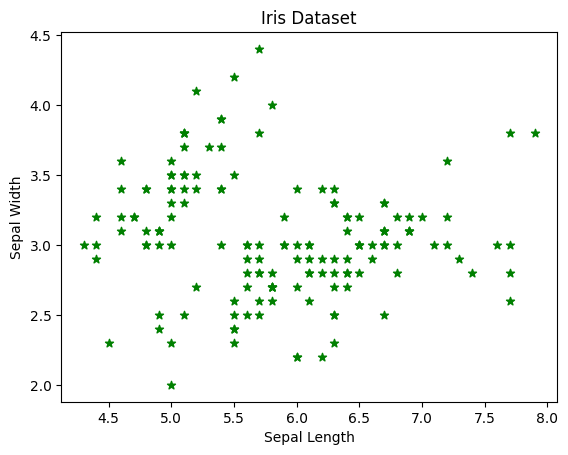

In [8]:
plt.scatter(df.SepalLengthCm,df.SepalWidthCm,color='g',marker='*')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset')

In [9]:
from sklearn.cluster import KMeans

In [18]:
km=KMeans(n_clusters=3)

y_predicted=km.fit_predict(df[['SepalLengthCm','SepalWidthCm']])
y_predicted

C:\Users\Gaurav Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [20]:
df['cluster']=y_predicted
df.head(4)

,Id,SepalLengthCm,SepalWidthCm,Species,cluster
0,1,5.1,3.5,Iris-setosa,2
1,2,4.9,3.0,Iris-setosa,2
2,3,4.7,3.2,Iris-setosa,2
3,4,4.6,3.1,Iris-setosa,2


In [21]:
km.cluster_centers_

array([[6.81276596, 3.07446809],
       [5.77358491, 2.69245283],
       [5.006     , 3.418     ]])

Text(0, 0.5, 'Sepal Width')

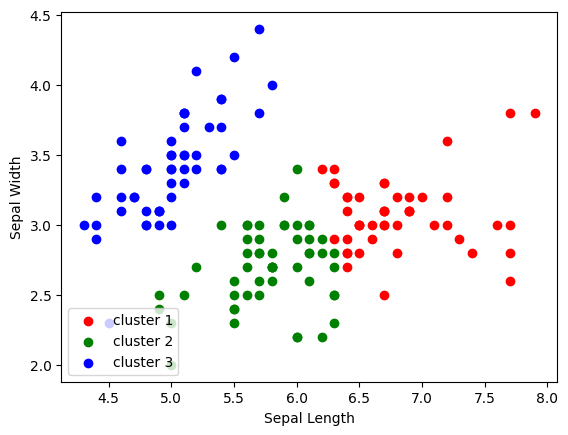

In [28]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.SepalLengthCm,df1.SepalWidthCm,color='r')
plt.scatter(df2.SepalLengthCm,df2.SepalWidthCm,color='g')
plt.scatter(df3.SepalLengthCm,df3.SepalWidthCm,color='b')
plt.legend(['cluster 1','cluster 2','cluster 3'],loc=3)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Preprocessing

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler=MinMaxScaler()

scaler.fit(df[['SepalLengthCm']])
df[['SepalWidthCm']]=scaler.transform(df[['SepalLengthCm']])

In [41]:
df.head(4)

,Id,SepalLengthCm,SepalWidthCm,Species,cluster
0,1,5.1,0.222222,Iris-setosa,2
1,2,4.9,0.166667,Iris-setosa,2
2,3,4.7,0.111111,Iris-setosa,2
3,4,4.6,0.083333,Iris-setosa,2


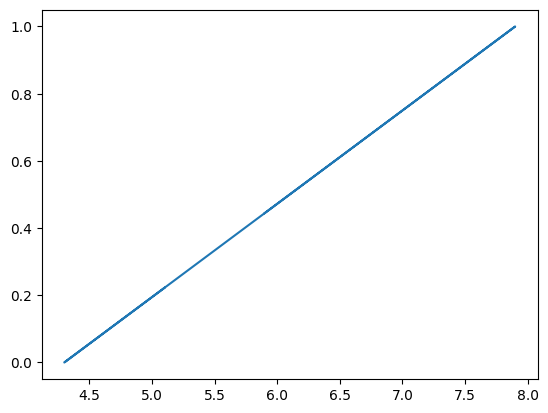

In [43]:
plt.plot(df.SepalLengthCm,df.SepalWidthCm)

In [50]:
km1=KMeans(n_clusters=3)
y_pred=km1.fit_predict(df[['SepalLengthCm','SepalWidthCm']])
df.cluster=y_pred
df

C:\Users\Gaurav Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Id,SepalLengthCm,SepalWidthCm,Species,cluster
0,1,5.1,0.222222,Iris-setosa,0
1,2,4.9,0.166667,Iris-setosa,0
2,3,4.7,0.111111,Iris-setosa,0
3,4,4.6,0.083333,Iris-setosa,0
4,5,5.0,0.194444,Iris-setosa,0
...,...,...,...,...,...
145,146,6.7,0.666667,Iris-virginica,2
146,147,6.3,0.555556,Iris-virginica,1
147,148,6.5,0.611111,Iris-virginica,1
148,149,6.2,0.527778,Iris-virginica,1


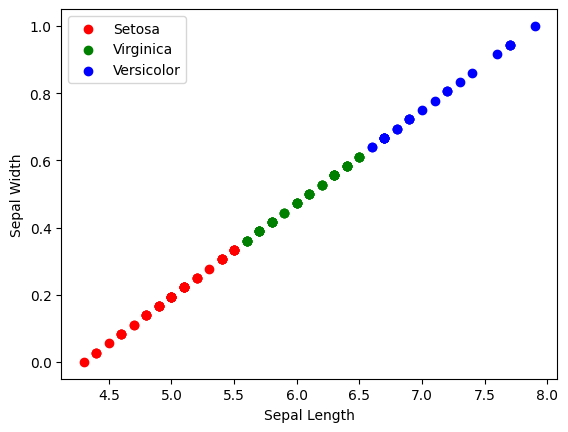

In [58]:
A=df[df.cluster==0]
B=df[df.cluster==1]
C=df[df.cluster==2]
plt.scatter(A.SepalLengthCm,A.SepalWidthCm,color='r')
plt.scatter(B.SepalLengthCm,B.SepalWidthCm,color='g')
plt.scatter(C.SepalLengthCm,C.SepalWidthCm,color='b')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(['Setosa','Virginica','Versicolor'],loc=0)

In [55]:
df.to_csv('C:/Users/Gaurav Singh/Desktop/jupyter/k-means.csv')